In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('data.csv',sep=';',decimal=",")

In [3]:
df.head()

,X,Y
0,0.200000,12.401920
1,0.579821,15.170104
2,1.451381,17.068404
3,2.355703,15.108237
4,3.111165,17.589645


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       37 non-null     float64
 1   Y       37 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


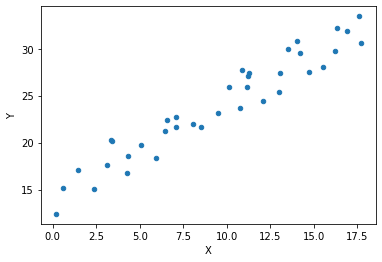

In [5]:
df.plot.scatter(x='X',y='Y')

In [12]:
from custlib.custom_transformer import custom_preproc

In [13]:
pipe = Pipeline([('preproc',custom_preproc()),('lin_reg',LinearRegression())])

pipe.fit(df['X'],df['Y'])

Pipeline(steps=[('preproc',
                 <custlib.custom_transformer.custom_preproc object at 0x000002B535902708>),
                ('lin_reg', LinearRegression())])

In [14]:
# X = df['X']
# X = df['X'].to_numpy().reshape(-1,1)
# y = df['Y']

# model = LinearRegression().fit(X,y)

In [15]:
print(pipe['lin_reg'].intercept_)
print(pipe['lin_reg'].coef_)

14.415770526062346
[1.01149751]


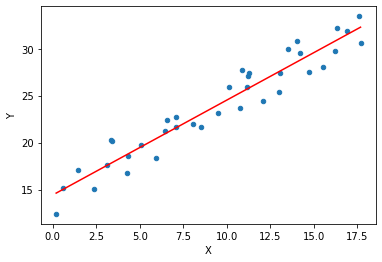

In [16]:
df.plot.scatter(x='X',y='Y')
plt.plot(df['X'],pipe['lin_reg'].coef_[0]*df['X']+pipe['lin_reg'].intercept_,'r')

In [17]:
# predict example
x_to_predict = 3
ypred = pipe.predict(x_to_predict)
print(ypred)

[17.45026306]


In [18]:
# save model
filename = 'pipe.pkl'
pickle.dump(pipe,open(filename,'wb'))